In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import seaborn as cb
from pyvis.network import Network
import json
import numpy as np
import nltk 
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import re
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import collections

In [3]:
tweets_spike = []

#scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Covid Vaccine since:2021-12-10 until:2022-02-20').get_items()): # declare a username
  if i>2000: #number of tweets you want to scrape
    break
  tweets_spike.append([tweet.content]) # declare the attributes to be returned

# creating a dataframe from the list
tweets_spike_df = pd.DataFrame(tweets_spike, columns=['Text'])

C:\Users\djona\AppData\Local\Temp\ipykernel_9548\3258167723.py:7: FutureWarning: content is deprecated, use rawContent instead
  tweets_spike.append([tweet.content]) # declare the attributes to be returned


In [4]:
file = open("tweet_spike.json",'w')
j = json.dumps(tweets_spike, default = str)
file.write(j)
file.close()

In [5]:
def clean_text(txt):
    cleaned = re.sub(r"http\S+","", txt)
    return cleaned

In [6]:
cleaned_text = [clean_text(elements) for elements in tweets_spike_df.Text]
tt = TweetTokenizer()
normalize = [tt.tokenize(elements.lower()) for elements in cleaned_text]

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\djona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))
stop_words.add('covid')
stop_words.add('vaccine')

# remove stop words and punctuation
complete = [[w for w in words if not w in stop_words if w.isalnum()] for words in normalize]


In [9]:
bigram1 = [list(bigrams(words)) for words in complete]
bigram1c = list(itertools.chain(*bigram1))
bigram_counter1 = collections.Counter(bigram1c)
bigram_counter1.most_common(20)

[(('dose', 'dose'), 157),
 (('slots', '0'), 77),
 (('free', 'slots'), 66),
 (('paid', 'slots'), 66),
 (('slots', 'dose'), 55),
 (('0', 'paid'), 44),
 (('fourth', 'shot'), 36),
 (('availability', 'pm'), 36),
 (('pm', 'free'), 36),
 (('45', 'availability'), 33),
 (('side', 'effects'), 30),
 (('shot', 'necessary'), 30),
 (('availability', 'free'), 30),
 (('drug', 'regulators'), 27),
 (('regulators', 'bar'), 27),
 (('bar', 'billion'), 27),
 (('billion', 'people'), 27),
 (('dose', 'paid'), 22),
 (('nicki', 'minaj'), 21),
 (('health', 'dept'), 21)]

In [10]:
bigram_spike_df = pd.DataFrame(bigram_counter1.most_common(250), columns=['bigram','count'])
bigram_spike_df

,bigram,count
0,"(dose, dose)",157
1,"(slots, 0)",77
2,"(free, slots)",66
3,"(paid, slots)",66
4,"(slots, dose)",55
...,...,...
245,"(arizona, secretary)",5
246,"(secretary, state)",5
247,"(public, health)",5
248,"(one, dose)",5


In [11]:
d = bigram_spike_df.set_index('bigram').T.to_dict('records')
G_spike = nx.Graph()

for k, v in d[0].items():
    G_spike.add_edge(k[0], k[1], weight=(v * 10))

In [12]:
G_spike.number_of_nodes()

264

In [13]:
net_spike = Network(height="800px", width="100%", bgcolor="#222222", font_color="white", notebook=True, directed=False)
net_spike.from_nx(G_spike)
net_spike.show_buttons(filter_=True)
net_spike.show("graph.html")

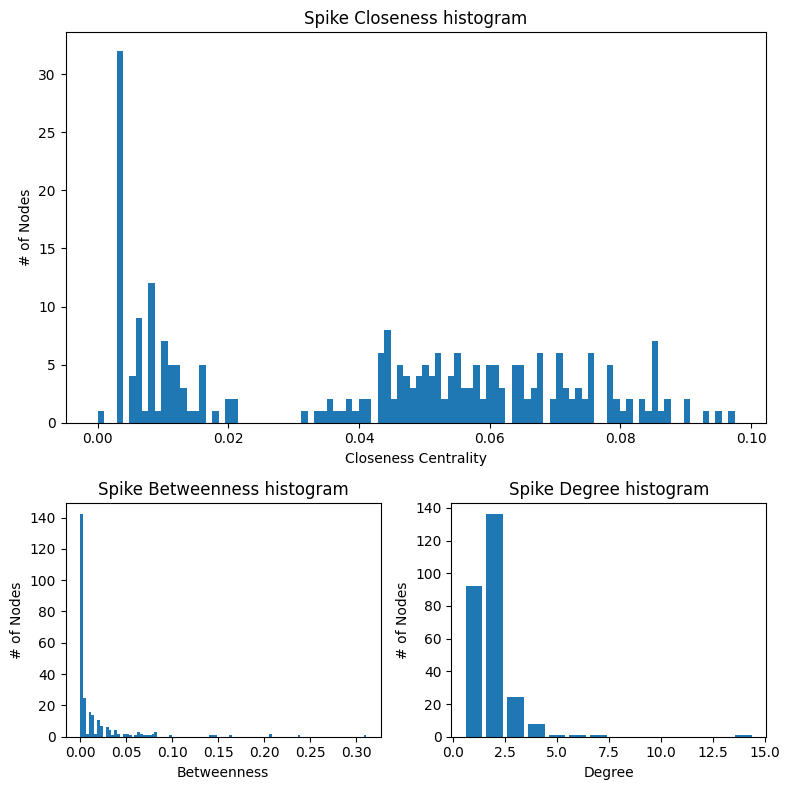

In [14]:
degree_sequence = sorted((d for n, d in G_spike.degree()), reverse=True)
dmax = max(degree_sequence)

centrality = nx.betweenness_centrality(G_spike)

closness = nx.closeness_centrality(G_spike)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax = fig.add_subplot(axgrid[0:3,:])
ax.hist(closness.values(), bins=100)
ax.set_title("Spike Closeness histogram")
ax.set_xlabel("Closeness Centrality")
ax.set_ylabel("# of Nodes")


ax1 = fig.add_subplot(axgrid[3:,:2])
ax1.hist(centrality.values(), bins=100)
ax1.set_title("Spike Betweenness histogram")
ax1.set_xlabel("Betweenness")
ax1.set_ylabel("# of Nodes")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Spike Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [15]:
tweets_dip = []
#scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Covid Vaccine since:2022-02-25 until:2022-04-01').get_items()): # declare a username
  if i>2000: #number of tweets you want to scrape
    break
  tweets_dip.append([tweet.content]) # declare the attributes to be returned

# creating a dataframe from the list
tweets_dip_df = pd.DataFrame(tweets_dip, columns=['Text'])

C:\Users\djona\AppData\Local\Temp\ipykernel_9548\584515612.py:6: FutureWarning: content is deprecated, use rawContent instead
  tweets_dip.append([tweet.content]) # declare the attributes to be returned


In [16]:
file = open("tweets_dip.json",'w')
j = json.dumps(tweets_dip, default = str)
file.write(j)
file.close()

In [17]:
cleaned_text2 = [clean_text(elements) for elements in tweets_dip_df.Text]
normalize2 = [tt.tokenize(elements.lower()) for elements in cleaned_text2]
# remove stop words and punctuation
complete2 = [[w for w in words if not w in stop_words if w.isalnum()] for words in normalize2]

In [18]:
bigram2 = [list(bigrams(words)) for words in complete2]
bigram2c = list(itertools.chain(*bigram2))
bigram_counter2 = collections.Counter(bigram2c)
bigram_counter2.most_common(20)

[(('biden', 'warns'), 59),
 (('warns', 'u'), 54),
 (('enough', 'shots'), 54),
 (('4th', 'dose'), 53),
 (('second', 'booster'), 52),
 (('u', 'enough'), 51),
 (('side', 'effects'), 48),
 (('novavax', 'asks'), 45),
 (('asks', 'eu'), 45),
 (('eu', 'regulator'), 45),
 (('regulator', 'clear'), 44),
 (('congress', 'fails'), 44),
 (('clear', 'teens'), 42),
 (('fall', 'congress'), 41),
 (('shots', 'fall'), 39),
 (('fails', 'pass'), 39),
 (('fourth', 'dose'), 37),
 (('pfizer', 'moderna'), 36),
 (('pass', 'funding'), 36),
 (('public', 'health'), 35)]

In [19]:
bigram_dip_df = pd.DataFrame(bigram_counter2.most_common(250), columns=['bigram','count'])
bigram_dip_df

,bigram,count
0,"(biden, warns)",59
1,"(warns, u)",54
2,"(enough, shots)",54
3,"(4th, dose)",53
4,"(second, booster)",52
...,...,...
245,"(hospital, stays)",5
246,"(stays, teens)",5
247,"(teens, 68)",5
248,"(68, kids)",5


In [20]:
d2 = bigram_dip_df.set_index('bigram').T.to_dict('records')
G_dip = nx.Graph()

for k, v in d2[0].items():
    G_dip.add_edge(k[0], k[1], weight=(v * 10))

In [21]:
G_dip.number_of_nodes()

246

In [22]:
net_dip = Network(height="800px", width="100%", bgcolor="#222222", font_color="white", notebook=True, directed=False)
net_dip.from_nx(G_dip)
net_dip.show_buttons(filter_=True)
net_dip.show("graph2.html")

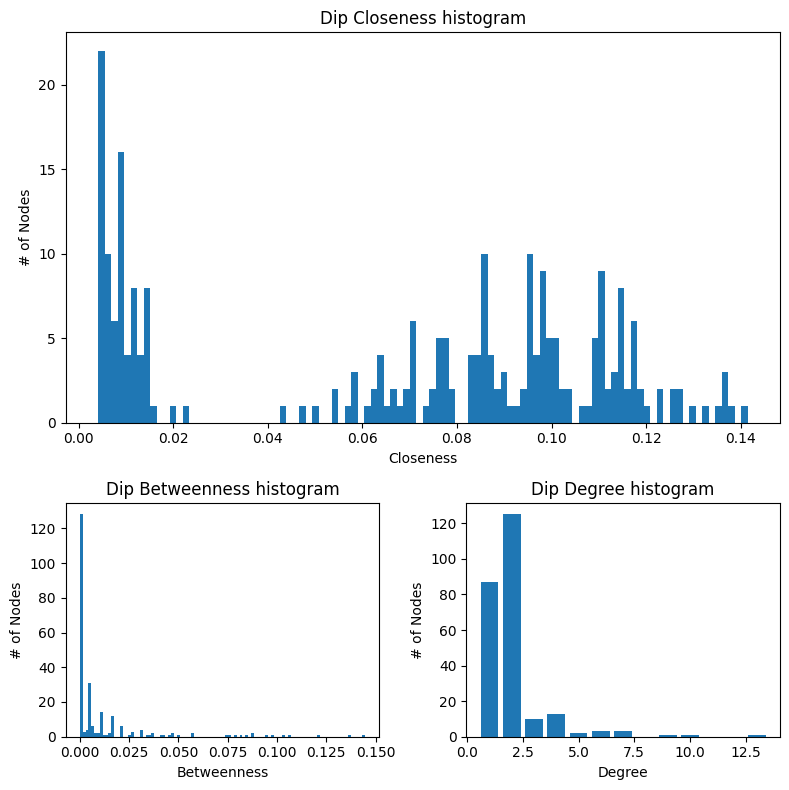

In [23]:
degree_sequence2 = sorted((d for n, d in G_dip.degree()), reverse=True)
dmax2 = max(degree_sequence)

centrality2 = nx.betweenness_centrality(G_dip)

closeness2 = nx.closeness_centrality(G_dip)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax = fig.add_subplot(axgrid[0:3,:])
ax.hist(closeness2.values(), bins=100)
ax.set_title("Dip Closeness histogram")
ax.set_xlabel("Closeness")
ax.set_ylabel("# of Nodes")


ax1 = fig.add_subplot(axgrid[3:,:2])
ax1.hist(centrality2.values(), bins=100)
ax1.set_title("Dip Betweenness histogram")
ax1.set_xlabel("Betweenness")
ax1.set_ylabel("# of Nodes")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence2, return_counts=True))
ax2.set_title("Dip Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()